In [1]:
import os, glob, pickle
import sys
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
%matplotlib inline

In [2]:
color_list = ['#D9F077', '#A6E6A9', '#7AE6AB', '#82AD7D', '#B8FFCA', '#ADE6A6',
       '#00979D', '#00DDC5', '#26FFF2', '#00A809', '#00FF00', '#26BF64',
       '#33A9CE', '#0094C2', '#00A79D', '#2F8C4D', '#00879D', '#669D6A',
       '#005C07', '#008F1F', '#53879D', '#53A39D', '#174F61', '#A19922',
       '#7F9922', '#C2E32C', '#96E32C', '#5100FF', '#0000FF', '#22737F',
       '#247740', '#00A863', '#29E043', '#53D385', '#1E806D', '#4A8044',
       '#008F39', '#3D9946', '#73CA95', '#47867A', '#006091', '#00B8C3',
       '#578EBF', '#5C89CC', '#74CAFF', '#69A8E6', '#74A0FF', '#1F6666',
       '#2B7880', '#388899', '#266180', '#494566', '#336D99', '#254566',
       '#335280', '#DDACC9', '#FF88AD', '#FFB8CE', '#DD6091', '#FF7290',
       '#FFA388', '#C77963', '#9440F3', '#9900B3', '#C266D1', '#6C00BF',
       '#A700FF', '#CA66FF', '#7779BF', '#8194CC', '#756FB3', '#9FAAFF',
       '#533691', '#9189FF', '#B09FFF', '#FF00FF', '#AF00E6', '#FF00B3',
       '#B3128A', '#FF4DC1', '#BD3D9A', '#882E81', '#AD589A', '#AC3491',
       '#FFFF00', '#FFBB33', '#804811', '#B06411', '#BF480D', '#CC6D3D',
       '#FFDF11', '#D6C300', '#FF9F2C', '#FF8011', '#FFB307', '#D9C566',
       '#BF9F00', '#806B19', '#B95541', '#C77767', '#C11331', '#BF8219',
       '#994C00', '#802600', '#A81111', '#ED4C50', '#FF2F7E', '#BC2B11',
       '#FF4343', '#C94545', '#E62A5D', '#E67A77', '#D6221D', '#AF3F64',
       '#FF197F']

In [3]:
path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(path) 
saving_folder = path + "/results/cpl_mixVAE/"


data_dict = pickle.load(open(saving_folder + '/summary_L4ITsuperTypes.p', 'rb'))
conf_mat_L4IT = data_dict['conf_mat_norm']
perform_L4IT = data_dict['conf_mat']
T_class_L4IT = data_dict['T_class']
c_L4IT = data_dict['c']

data_dict = pickle.load(open(saving_folder + '/summary_L23ITsuperTypes.p', 'rb'))
conf_mat_L23IT = data_dict['conf_mat_norm']
perform_L23IT = data_dict['conf_mat']
T_class_L23IT = data_dict['T_class']
c_L23IT = data_dict['c']

n_superTypes = len(T_class_L23IT) + len(T_class_L4IT)
n_c = len(c_L23IT) + len(c_L4IT)
perform_mat = np.zeros((n_superTypes, n_c))
perform_mat[:len(T_class_L23IT), :][:, :len(c_L23IT)] = perform_L23IT
perform_mat[len(T_class_L23IT):, :][:, len(c_L23IT):] = perform_L4IT

conf_mat = np.zeros((n_superTypes, n_c))
conf_mat[:len(T_class_L23IT), :][:, :len(c_L23IT)] = conf_mat_L23IT
conf_mat[len(T_class_L23IT):, :][:, len(c_L23IT):] = conf_mat_L4IT
T_class = np.concatenate((T_class_L23IT, T_class_L4IT))

ST_label = ['' for i_l in range(n_superTypes)]
for i_l, label in enumerate(T_class):
    ind = label.find('_')
    ST_label[i_l] = label[:ind] + '_S_' + label[ind+1:]

c_label_L23IT = ['' for i_l in c_L23IT]
for ic in range(len(c_L23IT)):
    c_label_L23IT[ic] = f'L2/3 IT_C_{int(ic+1)}'

c_label_L4IT = ['' for i_l in c_L4IT]
for ic in range(len(c_L4IT)):
    c_label_L4IT[ic] = f'L4 IT_C_{int(ic+1)}'

c_label = c_label_L23IT + c_label_L4IT

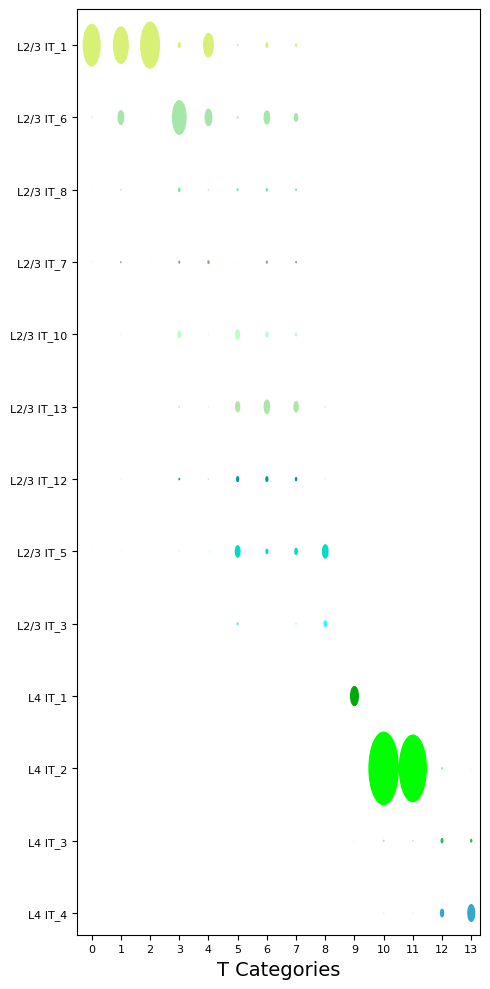

In [4]:
arm = 0
fig, ax = plt.subplots(1, 1, figsize=(5, 10))
mtx = perform_mat / np.max(perform_mat) / 2
for l in range(len(T_class)):
    for col in range(n_c):
        xy = np.array([col, l])
        ax.add_patch(plt.Circle(xy, radius=(mtx[l, col]), color=color_list[l]))
ax.set_xlim([-.5, n_c - .7])
ax.set_ylim([-.5, len(T_class) - .7])
ax.invert_yaxis()
ax.set_yticks(np.arange(len(T_class)))
ax.set_xticks(np.arange(n_c))
ax.set_yticklabels(T_class, fontsize=8)
ax.set_xticklabels(np.arange(n_c), fontsize=8)
ax.set_xlabel('T Categories', fontsize=14)
#     axs[0].set_ylabel('Supertypes', fontsize=14)

fig.tight_layout()
# plt.savefig(saving_folder + '/categorical_rep_K_' + str(model_order) + '.png', dpi=600)


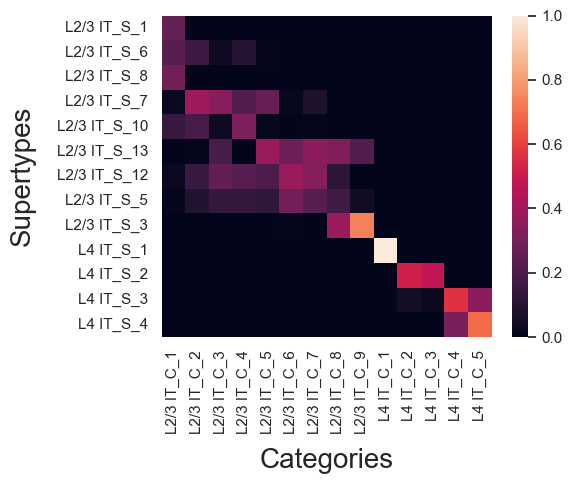

In [44]:
fig = plt.figure(figsize=(6, 5), dpi=100)
ax = fig.add_subplot()
sns.set(font_scale=1.)
sns.heatmap(np.squeeze(conf_mat), vmin=0, xticklabels=c_label, 
            yticklabels=ST_label, vmax=1, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel('Supertypes', fontsize=20, labelpad=15)
ax.set_xlabel('Categories', fontsize=20, labelpad=10)
fig.tight_layout()
# plt.savefig(saving_folder + '/confmax_exc_cell.png', dpi=600)

In [42]:
conf_mat.shape

(13, 14)

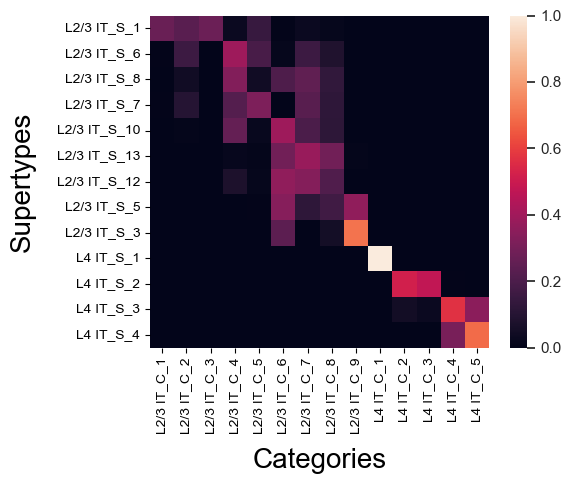

In [5]:
fig = plt.figure(figsize=(6, 5), dpi=100)
ax = fig.add_subplot()
sns.set(font_scale=1.)
sns.heatmap(np.squeeze(conf_mat), vmin=0, xticklabels=c_label, 
            yticklabels=ST_label, vmax=1, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel('Supertypes', fontsize=20, labelpad=15)
ax.set_xlabel('Categories', fontsize=20, labelpad=10)
fig.tight_layout()